# Data Mining in Yelp Data

Finding good restaurants in a specified locality is a tough challenge.
This is because there are vast number of people having different tastes. 
Also, finding more popular restaurant categories in a particular locality can be tricky.
This problem is interesting as we can create a business application using this data to reommend them particular cusine
according to the demographic. Thus we do data mining in yelp dataset to solve this problem

# Data Collection/Processing: 

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import json
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
#%pylab inline
import string

In [5]:
biz_f = open('yelp_academic_dataset_business.json',encoding="utf8")
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   188593 non-null  object 
 1   name          188593 non-null  object 
 2   neighborhood  188593 non-null  object 
 3   address       188593 non-null  object 
 4   city          188593 non-null  object 
 5   state         188593 non-null  object 
 6   postal_code   188593 non-null  object 
 7   latitude      188587 non-null  float64
 8   longitude     188587 non-null  float64
 9   stars         188593 non-null  float64
 10  review_count  188593 non-null  int64  
 11  is_open       188593 non-null  int64  
 12  attributes    162807 non-null  object 
 13  categories    188052 non-null  object 
 14  hours         143791 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [6]:
#Total number of reviews associated with nan values in categories
biz_df[biz_df['categories'].isnull()]['review_count'].sum()

3292

In [7]:
#Let's go ahead and drop the rows that have 'None' values for business categories.
biz_df.dropna(subset=['categories'],inplace=True)

In [8]:
#Next, we will parse and conver the categories to lists so that other operations can be performed on it.
#Total number of unique business categories in the dataset
biz_df['categories'].nunique()

85056

In [9]:
#Removing columns I don't need
biz_df = biz_df.drop(["business_id", "postal_code", "address", "is_open"], axis=1)

# Data Exploration: Exploring the Yelp Dataset


Finding the most popular business categories:


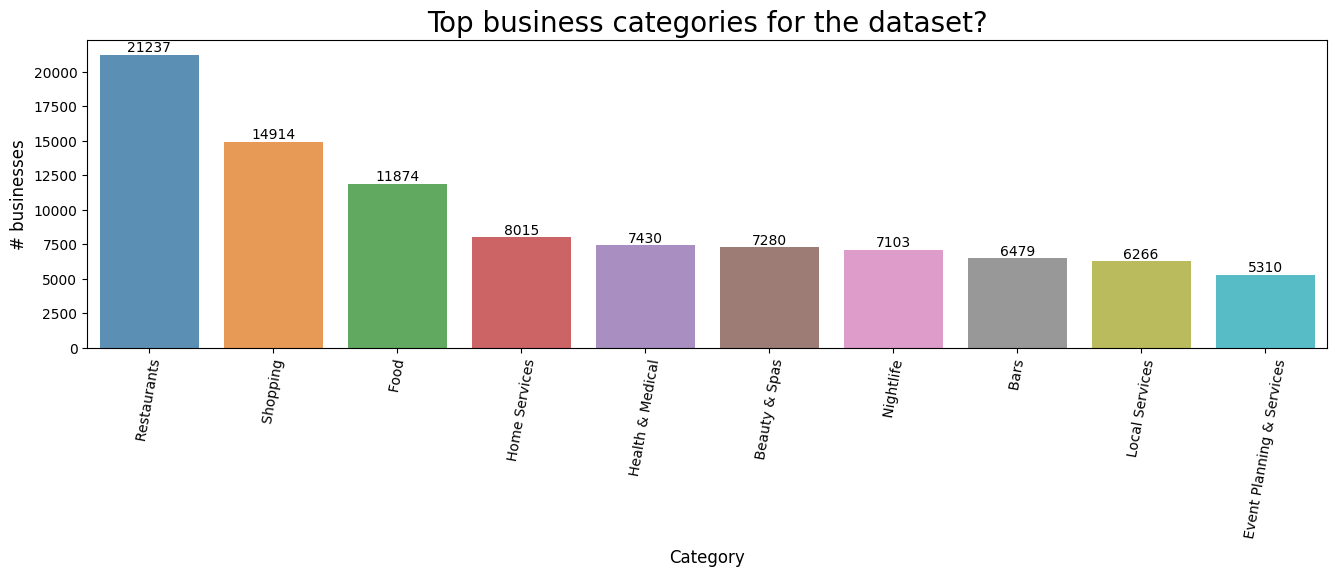

In [10]:

dfbusiness_cats = ''.join(biz_df['categories'].astype('str'))
#one category type per row
bcats=pd.DataFrame(dfbusiness_cats.split(','),columns=['categories'])

#prep for chart
x=bcats.categories.value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:10]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Top business categories for the dataset?",fontsize=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()





**(2) Finding the most popular business objects** 


In [149]:
chk_f = open('yelp_academic_dataset_checkin.json',encoding="utf8")
chk_df = pd.DataFrame([json.loads(x) for x in chk_f.readlines()])
chk_f.close()
chk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55569 entries, 0 to 55568
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   checkin_info  55569 non-null  object
 1   type          55569 non-null  object
 2   business_id   55569 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


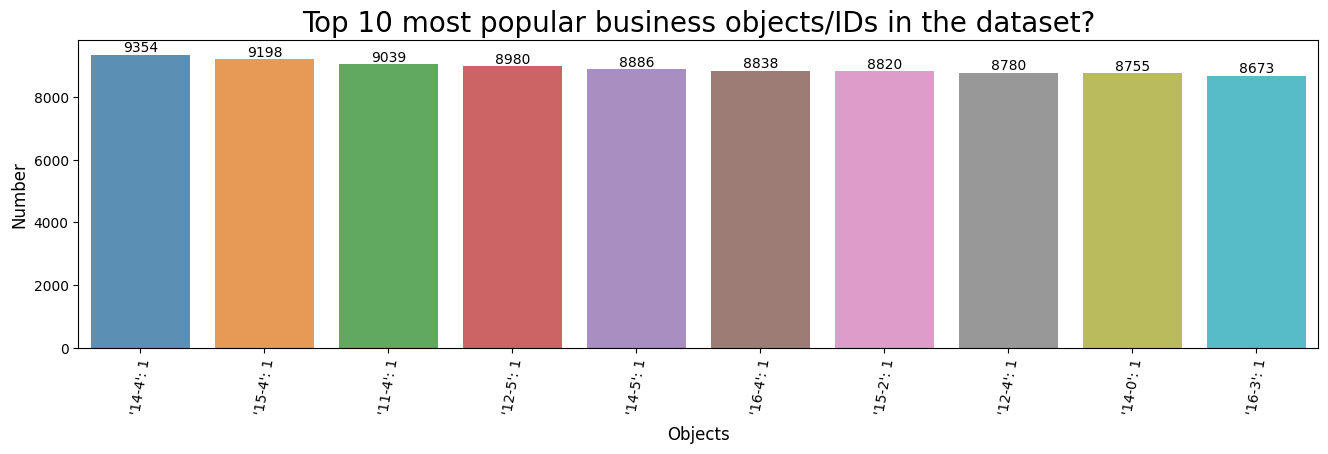

In [153]:
dfbusiness_cats = ''.join(chk_df['checkin_info'].astype('str'))
#one category type per row
bcats=pd.DataFrame(dfbusiness_cats.split(','),columns=['checkin_info'])

#prep for chart
x=bcats.checkin_info.value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:10]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Top 10 most popular business objects/IDs in the dataset?",fontsize=20)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Number', fontsize=12)
plt.xlabel('Objects', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**(3) Other explorations you would like to present** 


In [154]:
biz_df.describe()

,latitude,longitude,stars,review_count
count,188046.000000,188046.000000,188052.000000,188052.000000
mean,38.509571,-97.486345,3.635247,31.871280
std,5.118096,17.694902,1.013663,104.263408
min,-71.753941,-180.000000,1.000000,3.000000
25%,33.631497,-112.279660,3.000000,4.000000
50%,36.143638,-111.775663,3.500000,9.000000
75%,43.593224,-79.982772,4.500000,24.000000
max,85.051129,115.086769,5.000000,7968.000000


In [156]:
print("The average review is", biz_df["stars"].mean(), "stars")
print("The average review count is", biz_df["review_count"].mean())

The average review is 3.6352471656775784 stars
The average review count is 31.871280284176716


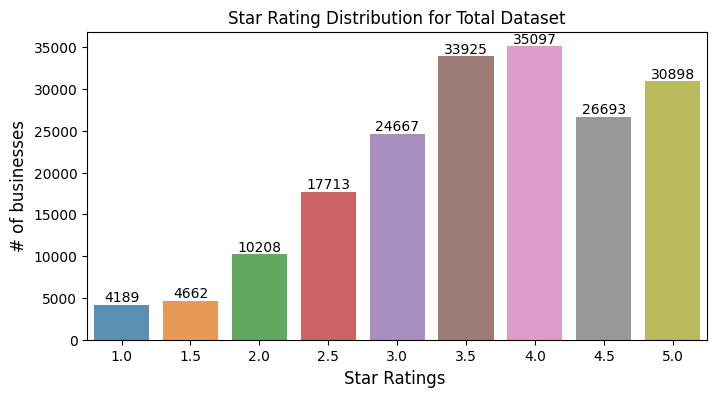

In [158]:

import matplotlib.pyplot as plt
import seaborn as sns

#Get the distribution of the ratings
x=biz_df["stars"].value_counts()
x=x.sort_index()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution for Total Dataset")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### It appears to have normal distribution since it has a bell curve shape.

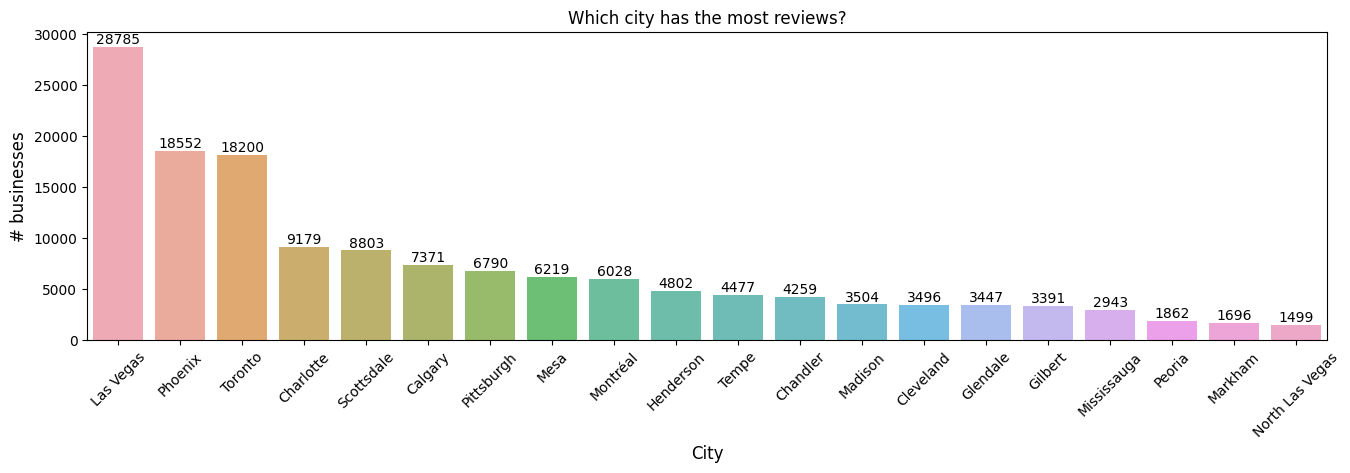

In [160]:
#Get the distribution of the ratings
x=biz_df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Results: Summarizing and Visualizing the results discovered from the analysis

Using figures or tables to present the results.


In [161]:
# trying the grouby feature in pandas, gives same top 5 as above
biz_df.groupby("city").size().sort_values(ascending=False)

city
Las Vegas               28785
Phoenix                 18552
Toronto                 18200
Charlotte                9179
Scottsdale               8803
                        ...  
Palgrave                    1
Painesville Township        1
Overbrook                   1
East Ajax                   1
Île-des-Soeurs              1
Length: 1109, dtype: int64

In [162]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#Create a dataframe with only Phoenix's data
phoenix = biz_df["city"].isin(["Phoenix"])
phoenixdf = biz_df[phoenix]
phoenixdf

,name,neighborhood,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
3,Geico Insurance,,Phoenix,AZ,33.449999,-112.076979,1.5,8,None,"Insurance, Financial Services",None
5,The Coffee Bean & Tea Leaf,,Phoenix,AZ,33.671375,-112.030017,4.0,63,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."
12,Original Hamburger Works,,Phoenix,AZ,33.479807,-112.091188,4.0,277,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","Bars, Sports Bars, Dive Bars, Burgers, Nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
22,Rib Shop,,Phoenix,AZ,33.495298,-112.236076,2.5,3,"{'Ambience': '{'romantic': False, 'intimate': ...","Nightlife, Bars, American (Traditional), Sport...",None
24,Salsitas,,Phoenix,AZ,33.479671,-112.225173,2.5,14,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Mexican, Restaurants",None
...,...,...,...,...,...,...,...,...,...,...,...
188518,Subway,,Phoenix,AZ,33.480112,-112.012566,3.0,8,"{'HasTV': 'False', 'RestaurantsDelivery': 'Fal...","Restaurants, Fast Food, Sandwiches",None
188521,Deer Valley Mini & RV Storage,,Phoenix,AZ,33.687445,-112.101457,3.5,3,{'BusinessAcceptsCreditCards': 'True'},"Local Services, Self Storage","{'Monday': '8:30-17:30', 'Tuesday': '8:30-17:3..."
188522,Punch Honeybee Company,,Phoenix,AZ,33.487426,-112.029708,4.5,14,{'BusinessAcceptsCreditCards': 'True'},"Local Services, Farmers Market, Food, Health M...","{'Monday': '6:0-5:30', 'Tuesday': '6:0-5:30', ..."
188533,Speed Auto Sales and Leasing,,Phoenix,AZ,33.521737,-112.065378,4.5,38,{'BusinessAcceptsCreditCards': 'True'},"Car Dealers, Automotive, Used Car Dealers, Car...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


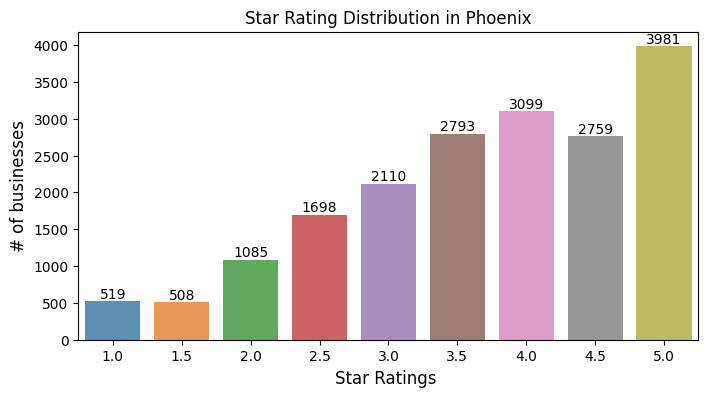

In [163]:
#plot Phoenix's star ratings distrbution
x=phoenixdf["stars"].value_counts()
x=x.sort_index()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution in Phoenix")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [164]:
#Search for restaurant within category column string
#Create a dataframe for Austin restaurants
cat_rest = phoenixdf[phoenixdf['categories'].str.contains('Rest.*')==True]
cat_rest

,name,neighborhood,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
12,Original Hamburger Works,,Phoenix,AZ,33.479807,-112.091188,4.0,277,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","Bars, Sports Bars, Dive Bars, Burgers, Nightli...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
22,Rib Shop,,Phoenix,AZ,33.495298,-112.236076,2.5,3,"{'Ambience': '{'romantic': False, 'intimate': ...","Nightlife, Bars, American (Traditional), Sport...",None
24,Salsitas,,Phoenix,AZ,33.479671,-112.225173,2.5,14,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Mexican, Restaurants",None
39,Little Caesars Pizza,,Phoenix,AZ,33.495422,-112.235798,2.0,4,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Pizza, Fast Food, Restaurants","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
47,Manuel's Mexican Restaurant & Cantina - Bell Rd,,Phoenix,AZ,33.639774,-112.087738,3.5,230,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","Event Planning & Services, Soup, Salad, Mexica...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...
188406,Jack in the Box,,Phoenix,AZ,33.378315,-112.031449,1.5,10,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Fast Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
188420,Ketzal Mexican Grill,,Phoenix,AZ,33.449900,-112.073900,2.0,13,"{'Alcohol': 'full_bar', 'BusinessAcceptsCredit...","Restaurants, Mexican","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."
188439,Hilal Grill,,Phoenix,AZ,33.466978,-111.995925,4.5,146,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Pakistani, Indian, Afghan, Restaurants","{'Tuesday': '11:0-20:30', 'Wednesday': '11:0-2..."
188511,Sushi Sonora,,Phoenix,AZ,33.464078,-112.013154,4.5,19,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Sushi Bars, Restaurants, Mexican","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."


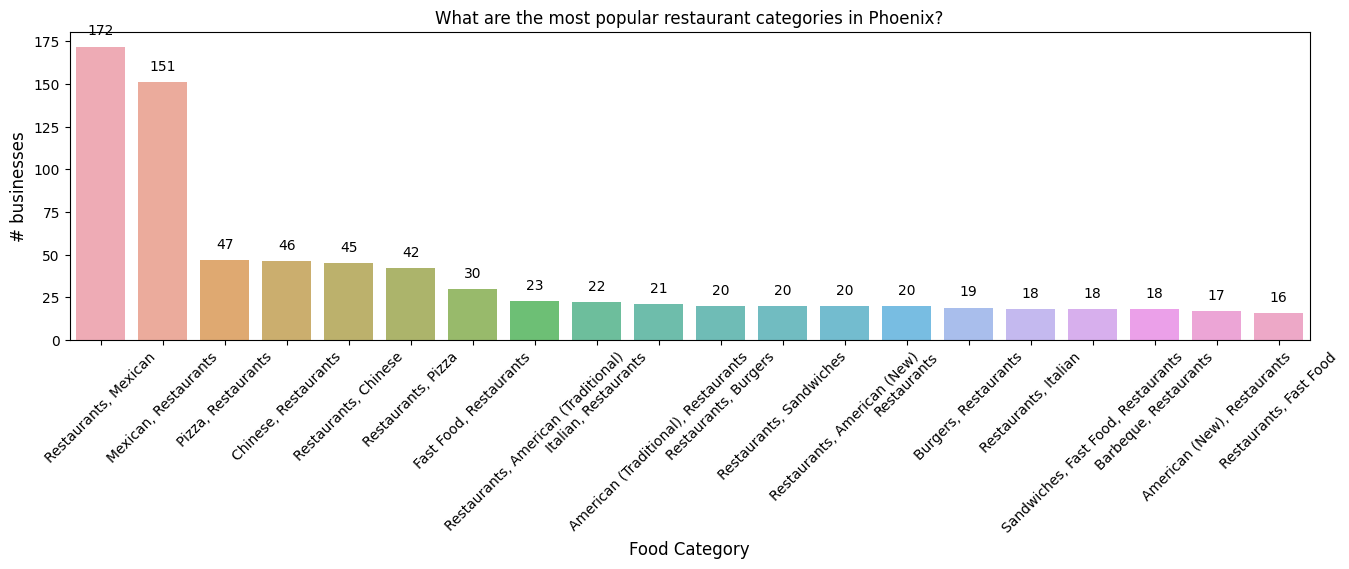

In [165]:
#Visualize the top 20 restaurant categories
#Creating x value of the column categories and include counts for y value
x=cat_rest['categories'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("What are the most popular restaurant categories in Phoenix?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Food Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
